In [63]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np

In [330]:
def makeCanny(img, filt_args=(5, 7, 5)):
    b_filter = cv2.bilateralFilter(img, *filt_args)
    edges = cv2.Canny(b_filter, 50, 175)
    plt.figure(figsize=(15,20))
    plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    return edges
    

def showContours(edges):
    count_of_contours = 0
    contours, hieract = cv2.findContours(edges.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    img_2 = img2.copy()
    contours = sorted(contours, key=cv2.contourArea)
    for c, hier in zip(contours, hieract[0]):
        (x,y,w,h) = cv2.boundingRect(c)
        area = cv2.contourArea(c, True)
        arc_len = cv2.arcLength(c, True)
        if area < 6000 and (arc_len > 10 and abs(area > 3) and (w > 15 or h > 12)):
            count_of_contours += 1
            cv2.rectangle(img_2, (x, y), (x + w, y + h), (255, 0, 0), 9)
#             cv2.drawContours(img_2, c, -1, (255, 0, 0), 2)
    plt.figure(figsize=(15,20))
    print(f'number of counters: {count_of_contours}')
    plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))

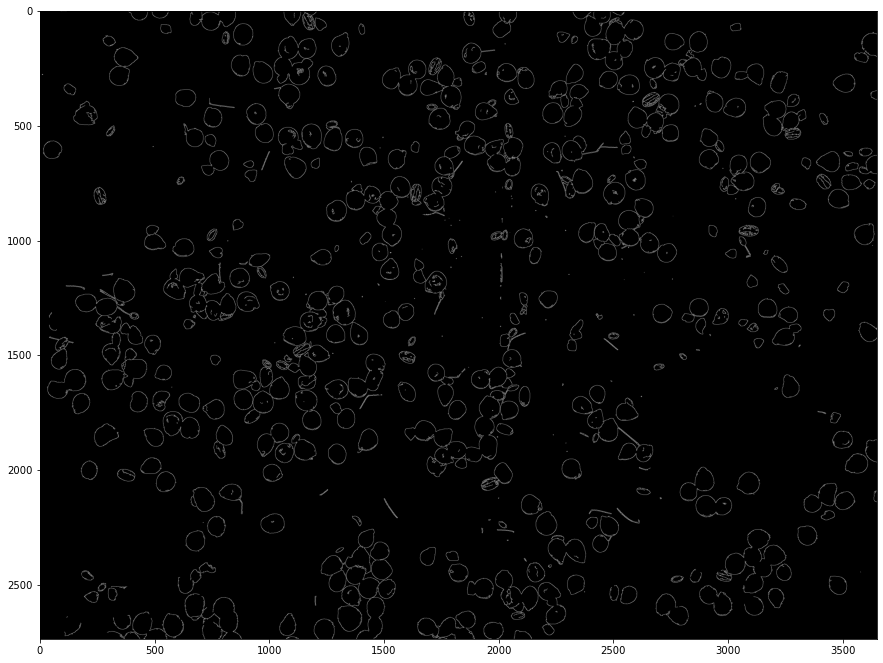

In [331]:
img2 = cv2.imread('D:/projects/CornClassifier/resources/IMG_4324.JPG')
img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
edges = makeCanny(img)

number of counters: 157


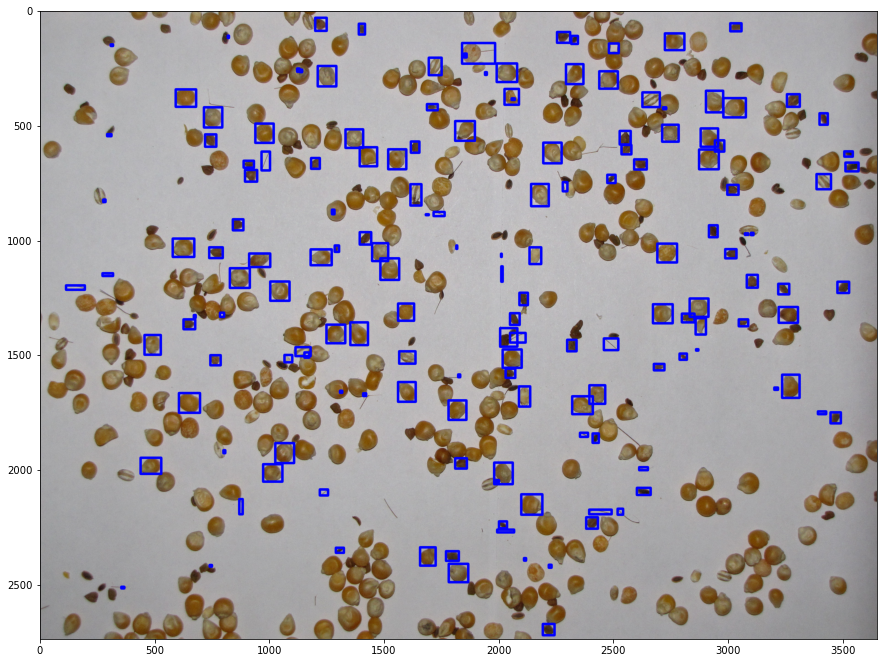

In [318]:
showContours(edges)

In [ ]:
for i in range(4310, 4331):
    img2 = cv2.imread(f'D:/projects/CornClassifier/resources/IMG_{i}.JPG')
    img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    edges = makeCanny(img, (10, 35, 35))
    showContours(edges)

In [ ]:
for i in range(4310, 4331):
    img2 = cv2.imread(f'D:/projects/CornClassifier/resources/IMG_{i}.JPG')
    img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(img, (9, 9), 0)
    filter_img = cv2.bilateralFilter(img, d=15, sigmaColor=55, sigmaSpace=55)
    ret, thresh = cv2.threshold(filter_img,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.figure(figsize=(15, 20))
    plt.imshow(thresh, 'gray')
    showContours(thresh)

In [ ]:
edge = makeCanny(img, (10, 35, 35))
showContours(edge)